In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('./master.csv')
df = df.drop(['HDI for year'],  axis=1)
df = df.drop(['generation'],  axis=1)
print('The number of training examples before dropna: ', len(df))
df = df.dropna()
print('The number of training examples after dropna: ', len(df))
print('Total number of features: ', len(df.columns))
df.head()



The number of training examples before dropna:  27820
The number of training examples after dropna:  27820
Total number of features:  10


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($)
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796


In [3]:
for col in df.columns:
    print('Number of unique {}:'.format(col), len(np.unique(df[col])))

print('Total number of suicide cases: {}'.format(sum(df.suicides_no)))

Number of unique country: 101
Number of unique year: 32
Number of unique sex: 2
Number of unique age: 6
Number of unique suicides_no: 2084
Number of unique population: 25564
Number of unique suicides/100k pop: 5298
Number of unique country-year: 2321
Number of unique  gdp_for_year ($) : 2321
Number of unique gdp_per_capita ($): 2233
Total number of suicide cases: 6748420


In [4]:
gdp = []
# convert gdp_for_year from string to ints 
for i, string in enumerate(df[df.columns[8]]):
    gdp.append(int(string.replace(',','')))
    

# put the results in a new column    
gdp_frame =pd.DataFrame()
gdp_frame['gdp'] = np.array(gdp)
new = pd.concat((df,gdp_frame),axis=1)

new=new.rename(columns={"suicides/100k pop": "suicides_per_100k"})
new.head()


,country,year,sex,age,suicides_no,population,suicides_per_100k,country-year,gdp_for_year ($),gdp_per_capita ($),gdp
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,2156624900
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,2156624900
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,2156624900
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,2156624900
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,2156624900


In [5]:
def suicide_gender_year(df):
    
    df2 = df[df['sex'] == 'male']
    dict = {}
    count =  np.array(df2['suicides_per_100k'])
    for ind, y in enumerate(df2['year']):
        if y not in dict:
            dict[y] = 0
            dict[y] += count[ind]
        else:
            dict[y] += count[ind]
            
    
    lists = list(dict.items())
    x,y = zip(*lists)
    plt.bar(x,y, label='male')
    
    df2 = df[df['sex'] == 'female']
    dict = {}
    count =  np.array(df2['suicides_per_100k'])
    for ind, y in enumerate(df2['year']):
        if y not in dict:
            dict[y] = 0
            dict[y] += count[ind]
        else:
            dict[y] += count[ind]
            
    
    lists = list(dict.items())
    x,y = zip(*lists)
    plt.bar(x,y, label='female')
    
    
    plt.legend(loc='best')
    
    
    plt.title('Gender Suicide Rate over different Years')
    plt.xlabel('Year')
    plt.ylabel('counts')
    plt.grid(True)
    plt.show()
    

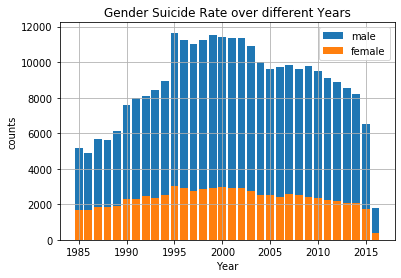

In [6]:
suicide_gender_year(new)

In [7]:
def suicides_gdp_gender(df, country):
    p1 = df[df['country'] == country]
    pm = p1[p1['sex'] == 'male']
    sui_num = []
    gdp = []
    for year in pm['year'].unique():
        p2 = pm[pm['year'] == year]
        sui_num.append(sum(p2.suicides_no))
        gdp.append(np.average(p2['gdp']))
        
    x = []
    y = []
    for i,j in sorted(zip(gdp,sui_num)):
        x.append(i)
        y.append(j)

    plt.scatter(x,y,label='male')
    
    pf = p1[p1['sex'] == 'female']
    sui_num = []
    gdp = []
    for year in pf['year'].unique():
        p2 = pf[pf['year'] == year]
        sui_num.append(sum(p2.suicides_no))
        gdp.append(np.average(p2['gdp']))
        
    x = []
    y = []
    for i,j in sorted(zip(gdp,sui_num)):
        x.append(i)
        y.append(j)
    
    plt.scatter(x,y,label='female')
    
    plt.legend(loc='best')
    
    
    plt.title('{}'.format(country))
    plt.xlabel('gdp')
    plt.ylabel('suicide count')
    plt.grid()
    plt.show()
        

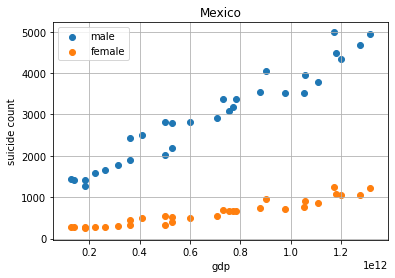

In [8]:
suicides_gdp_gender(new, 'Mexico')

In [50]:
def countries_suicide_rate(df):
    rate=[]
    countries=[]

    for country in df['country'].unique():
        countries.append(country)
        rate.append(np.sum(df[df['country']==country].suicides_per_100k))
        
    fig = plt.figure(figsize=(150,6))
    plt.bar(countries,rate)
    plt.show()

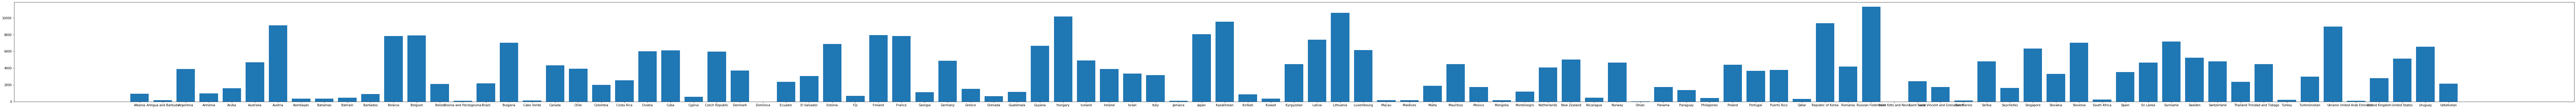

In [51]:
countries_suicide_rate(new)

In [42]:
def suicides_age_year(df, age):
    df2 = df[df['age'] == age]
    dfm = df2[df2['sex']== 'male']
    dict = {}
    count =  np.array(dfm['suicides_per_100k'])
    for ind, y in enumerate(dfm['year']):
        if y not in dict:
            dict[y] = 0
            dict[y] += count[ind]
        else:
            dict[y] += count[ind]
            
    
    lists = list(dict.items())
    x,y = zip(*lists)
    plt.bar(x,y, label='male')
    
    
    
    dff = df2[df2['sex']=='female']
    
    dict = {}
    count =  np.array(dff['suicides_per_100k'])
    for ind, y in enumerate(dff['year']):
        if y not in dict:
            dict[y] = 0
            dict[y] += count[ind]
        else:
            dict[y] += count[ind]
            
    
    lists = list(dict.items())
    x,y = zip(*lists)
    plt.bar(x,y,label='female')
    
    plt.legend(loc='best')

    
    plt.title('age: {}'.format(age))
    plt.xlabel('year')
    plt.ylabel('suicides/100k pop')
    plt.grid()
    plt.show()
    

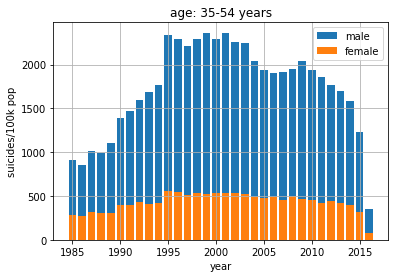

In [43]:
suicides_age_year(new, '35-54 years')

In [98]:
def suicides_per100k_age(df):
    ages=[]
    rate=[]
    
    for age in df['age'].unique():
        ages.append(age)
        rate.append(np.sum(df[df['age']==age].suicides_per_100k))
        
    
    fig = plt.figure(figsize=(15,10))
    plt.pie(rate, labels=ages, autopct='%1.1f%%')
    plt.show()
    
    
    
    

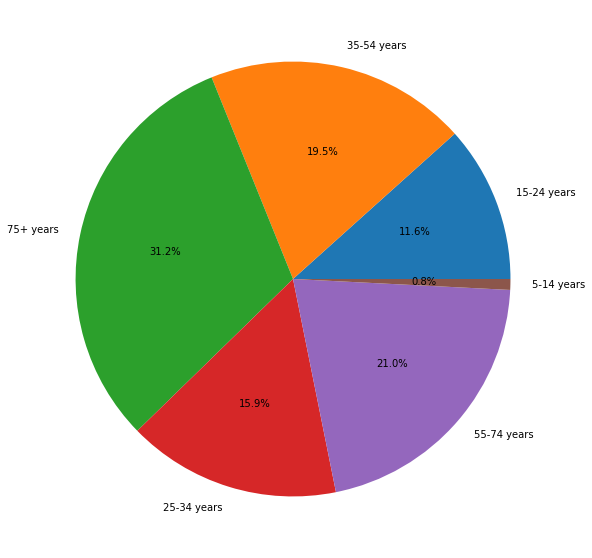

In [99]:
suicides_per100k_age(new)

In [100]:
def suicides_no_age(df):
    ages=[]
    rate=[]
    
    for age in df['age'].unique():
        ages.append(age)
        rate.append(np.sum(df[df['age']==age].suicides_no))
        
    
    fig = plt.figure(figsize=(15,10))
    plt.pie(rate, labels=ages, autopct='%1.1f%%')
    plt.show()

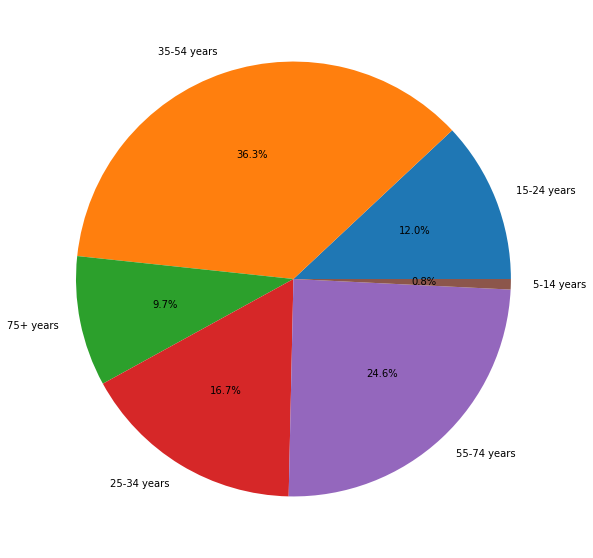

In [101]:
suicides_no_age(new)